In [89]:
# Add your imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read confirmed cases data
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed_cases = confirmed_cases.drop(['Lat', 'Long'], axis=1)

In [3]:
# gather data for all of Australia
confirmedAU = confirmed_cases.loc[confirmed_cases['Country/Region'] == 'Australia']
AU_sums = confirmedAU.sum(axis=0)
AU_sums[1] = 'Australia'
confirmedAU_sum = pd.DataFrame(AU_sums).T.drop(['Province/State'], axis=1)

# gather data for all of Canada
confirmedCA = confirmed_cases.loc[confirmed_cases['Country/Region'] == 'Canada']
CA_sums = confirmedCA.sum(axis=0)
CA_sums[1] = 'Canada'
confirmedCA_sum = pd.DataFrame(CA_sums).T.drop(['Province/State'], axis=1)

# gather data for all of China
confirmedCH = confirmed_cases.loc[confirmed_cases['Country/Region'] == 'China']
CH_sums = confirmedCH.sum(axis=0)
CH_sums[1] = 'China'
confirmedCH_sum = pd.DataFrame(CH_sums).T.drop(['Province/State'], axis=1)

# add the data to the data frame
confirmed_cases_cleaned = confirmed_cases.append(confirmedAU_sum)
confirmed_cases_cleaned = confirmed_cases_cleaned.append(confirmedCA_sum)
confirmed_cases_cleaned = confirmed_cases_cleaned.append(confirmedCH_sum)

# remove province/states from our data so we only have totals for countries
confirmed_cases_cleaned = confirmed_cases_cleaned.drop(confirmed_cases_cleaned[confirmed_cases_cleaned['Province/State'] == confirmed_cases_cleaned['Province/State']].index)

# reorganize the dataframe with the compiled data
confirmed_cases_cleaned = confirmed_cases_cleaned.sort_values(by='Country/Region').reset_index().drop(['index', 'Province/State'], axis=1)
confirmed_cases_cleaned

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,46718,46837,46837,47072,47306,47516,47716,47851,48053,48116
1,Albania,0,0,0,0,0,0,0,0,0,...,39719,40501,41302,42148,42988,43683,44436,45188,46061,46863
2,Algeria,0,0,0,0,0,0,0,0,0,...,85084,85927,86730,87502,88252,88825,89416,90014,90579,91121
3,Andorra,0,0,0,0,0,0,0,0,0,...,6842,6904,6955,7005,7050,7084,7127,7162,7190,7236
4,Angola,0,0,0,0,0,0,0,0,0,...,15319,15361,15493,15536,15591,15648,15729,15804,15925,16061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Vietnam,0,2,2,2,2,2,2,2,2,...,1358,1361,1361,1365,1366,1367,1377,1381,1385,1391
187,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,90192,92708,94676,96098,98038,99758,101109,102992,104879,106622
188,Yemen,0,0,0,0,0,0,0,0,0,...,2217,2239,2267,2304,2337,2383,2078,2079,2081,2082
189,Zambia,0,0,0,0,0,0,0,0,0,...,17700,17730,17857,17898,17916,17931,17963,18062,18091,18161


In [4]:
# generate daily cases data
daily_nums = []
for i in range(len(confirmed_cases_cleaned)):
    series = []
    for j in range(1, len(confirmed_cases_cleaned.columns) - 1):
        series.append(confirmed_cases_cleaned.loc[i][j+1] - confirmed_cases_cleaned.loc[i][j])
    daily_nums.append(series)

daily_cases_global = pd.DataFrame(daily_nums)
daily_cases_global.columns = confirmed_cases_cleaned.columns[2:]
daily_cases_global.insert(0, 'Country', confirmed_cases_cleaned['Country/Region'])

# set negative numbers to 0
daily_cases_global._get_numeric_data()[daily_cases_global._get_numeric_data() < 0] = 0
daily_cases_global

,Country,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,202,119,0,235,234,210,200,135,202,63
1,Albania,0,0,0,0,0,0,0,0,0,...,705,782,801,846,840,695,753,752,873,802
2,Algeria,0,0,0,0,0,0,0,0,0,...,932,843,803,772,750,573,591,598,565,542
3,Andorra,0,0,0,0,0,0,0,0,0,...,52,62,51,50,45,34,43,35,28,46
4,Angola,0,0,0,0,0,0,0,0,0,...,68,42,132,43,55,57,81,75,121,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Vietnam,2,0,0,0,0,0,0,0,0,...,7,3,0,4,1,1,10,4,4,6
187,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,2188,2516,1968,1422,1940,1720,1351,1883,1887,1743
188,Yemen,0,0,0,0,0,0,0,0,0,...,20,22,28,37,33,46,0,1,2,1
189,Zambia,0,0,0,0,0,0,0,0,0,...,35,30,127,41,18,15,32,99,29,70


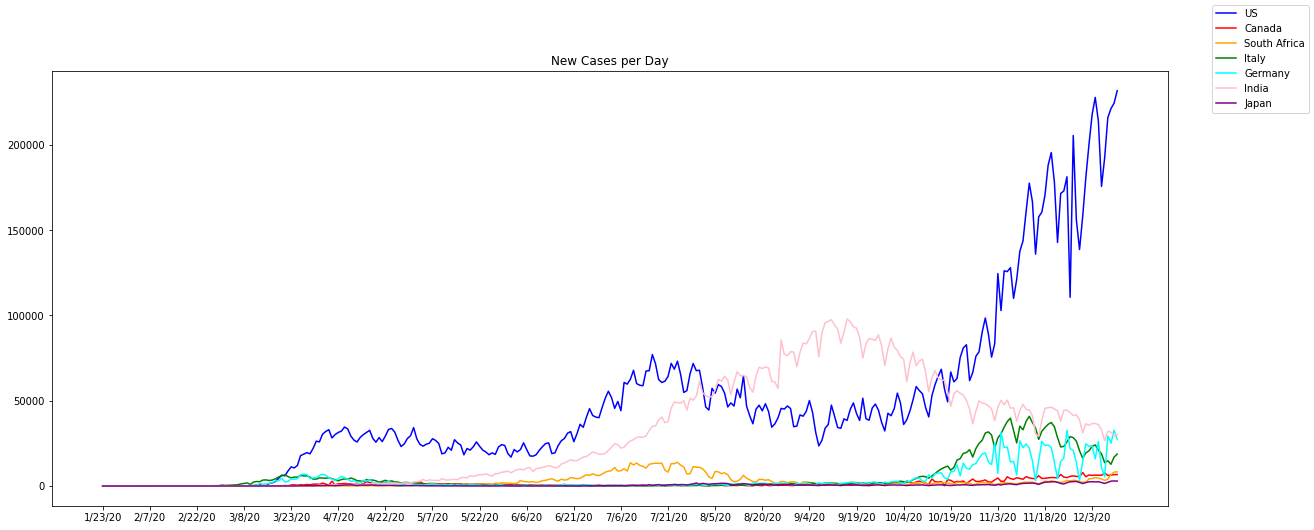

In [70]:
# plot daily case numbers
daily_cases_chart = plt.figure(figsize=(20, 8))
plt.plot(daily_cases_global.columns[1:], daily_cases_global[daily_cases_global['Country'] == 'US'].iloc[0][1:], color='blue')
plt.plot(daily_cases_global.columns[1:], daily_cases_global[daily_cases_global['Country'] == 'Canada'].iloc[0][1:], color='red')
plt.plot(daily_cases_global.columns[1:], daily_cases_global[daily_cases_global['Country'] == 'South Africa'].iloc[0][1:], color='orange')
plt.plot(daily_cases_global.columns[1:], daily_cases_global[daily_cases_global['Country'] == 'Italy'].iloc[0][1:], color='green')
plt.plot(daily_cases_global.columns[1:], daily_cases_global[daily_cases_global['Country'] == 'Germany'].iloc[0][1:], color='cyan')
plt.plot(daily_cases_global.columns[1:], daily_cases_global[daily_cases_global['Country'] == 'India'].iloc[0][1:], color='pink')
plt.plot(daily_cases_global.columns[1:], daily_cases_global[daily_cases_global['Country'] == 'Japan'].iloc[0][1:], color='purple')
plt.xticks(np.arange(len(daily_cases_global.columns[1:]), step=15))
plt.title('New Cases per Day',)

daily_cases_chart.legend(['US', 'Canada', 'South Africa', 'Italy', 'Germany', 'India', 'Japan'])

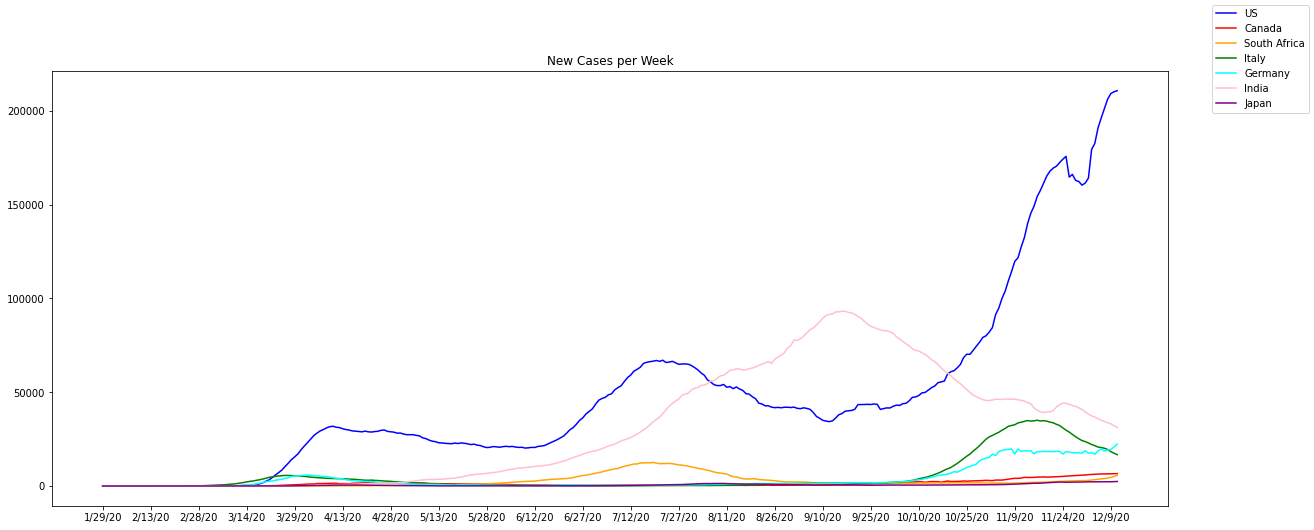

In [71]:
# calculate weekly cases for each country
weekly_cases_global = daily_cases_global.rolling(window=7, axis=1).mean()
weekly_cases_global.insert(0, 'Country', daily_cases_global['Country'])
weekly_cases_global = weekly_cases_global.dropna(axis=1)

weekly_cases_chart = plt.figure(figsize=(20, 8))
plt.plot(weekly_cases_global.columns[1:], weekly_cases_global[weekly_cases_global['Country'] == 'US'].iloc[0][1:], color='blue')
plt.plot(weekly_cases_global.columns[1:], weekly_cases_global[weekly_cases_global['Country'] == 'Canada'].iloc[0][1:], color='red')
plt.plot(weekly_cases_global.columns[1:], weekly_cases_global[weekly_cases_global['Country'] == 'South Africa'].iloc[0][1:], color='orange')
plt.plot(weekly_cases_global.columns[1:], weekly_cases_global[weekly_cases_global['Country'] == 'Italy'].iloc[0][1:], color='green')
plt.plot(weekly_cases_global.columns[1:], weekly_cases_global[weekly_cases_global['Country'] == 'Germany'].iloc[0][1:], color='cyan')
plt.plot(weekly_cases_global.columns[1:], weekly_cases_global[weekly_cases_global['Country'] == 'India'].iloc[0][1:], color='pink')
plt.plot(weekly_cases_global.columns[1:], weekly_cases_global[weekly_cases_global['Country'] == 'Japan'].iloc[0][1:], color='purple')
plt.title('New Cases per Week',)
plt.xticks(np.arange(len(weekly_cases_global.columns[1:]), step=15))

weekly_cases_chart.legend(['US', 'Canada', 'South Africa', 'Italy', 'Germany', 'India', 'Japan'])

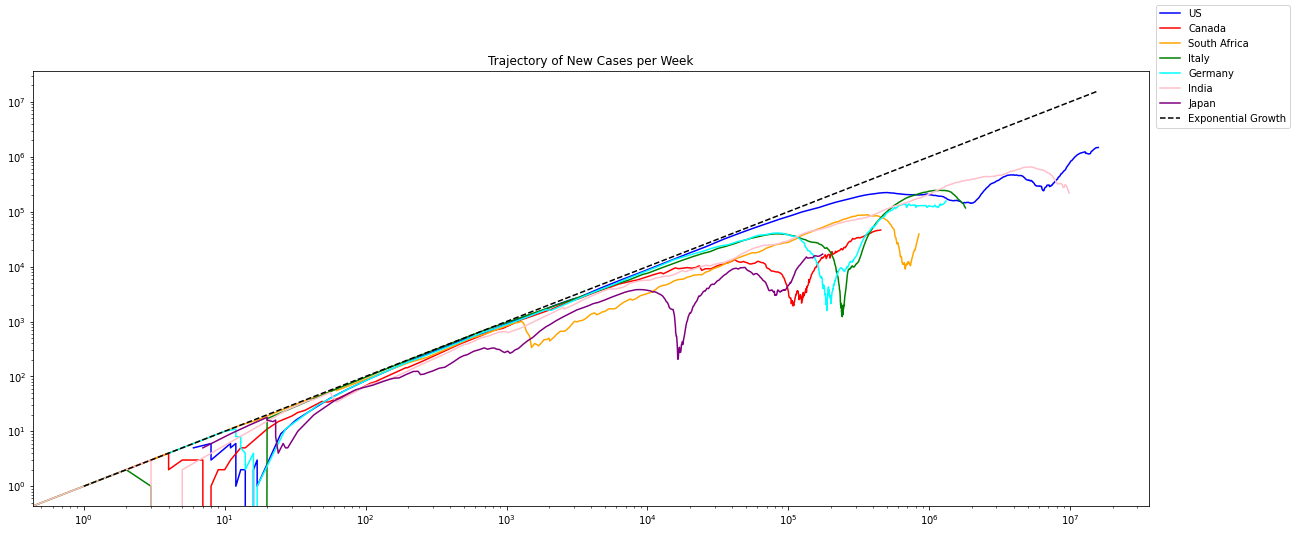

In [72]:
# plot the weekly trajectory for each country
total_weekly_cases_global = daily_cases_global.rolling(window=7, axis=1).sum()
total_weekly_cases_global.insert(0, 'Country', daily_cases_global['Country'])
total_weekly_cases_global = total_weekly_cases_global.dropna(axis=1)

weekly_growth_chart = plt.figure(figsize=(20, 8))
plt.plot(confirmed_cases_cleaned[confirmed_cases_cleaned['Country/Region'] == 'US'].iloc[0][8:], 
         total_weekly_cases_global[total_weekly_cases_global['Country'] == 'US'].iloc[0][1:], color='blue')
plt.plot(confirmed_cases_cleaned[confirmed_cases_cleaned['Country/Region'] == 'Canada'].iloc[0][8:], 
         total_weekly_cases_global[total_weekly_cases_global['Country'] == 'Canada'].iloc[0][1:], color='red')
plt.plot(confirmed_cases_cleaned[confirmed_cases_cleaned['Country/Region'] == 'South Africa'].iloc[0][8:], 
         total_weekly_cases_global[total_weekly_cases_global['Country'] == 'South Africa'].iloc[0][1:], color='orange')
plt.plot(confirmed_cases_cleaned[confirmed_cases_cleaned['Country/Region'] == 'Italy'].iloc[0][8:], 
         total_weekly_cases_global[total_weekly_cases_global['Country'] == 'Italy'].iloc[0][1:], color='green')
plt.plot(confirmed_cases_cleaned[confirmed_cases_cleaned['Country/Region'] == 'Germany'].iloc[0][8:], 
         total_weekly_cases_global[total_weekly_cases_global['Country'] == 'Germany'].iloc[0][1:], color='cyan')
plt.plot(confirmed_cases_cleaned[confirmed_cases_cleaned['Country/Region'] == 'India'].iloc[0][8:], 
         total_weekly_cases_global[total_weekly_cases_global['Country'] == 'India'].iloc[0][1:], color='pink')
plt.plot(confirmed_cases_cleaned[confirmed_cases_cleaned['Country/Region'] == 'Japan'].iloc[0][8:], 
         total_weekly_cases_global[total_weekly_cases_global['Country'] == 'Japan'].iloc[0][1:], color='purple')
plt.plot([confirmed_cases_cleaned[confirmed_cases_cleaned['Country/Region'] == 'US'].iloc[0][1], confirmed_cases_cleaned[confirmed_cases_cleaned['Country/Region'] == 'US'].iloc[0][-1]], 
          [confirmed_cases_cleaned[confirmed_cases_cleaned['Country/Region'] == 'US'].iloc[0][1], confirmed_cases_cleaned[confirmed_cases_cleaned['Country/Region'] == 'US'].iloc[0][-1]],
        'k--')
plt.yscale('log')
plt.xscale('log')
plt.title('Trajectory of New Cases per Week')
weekly_growth_chart.legend(['US', 'Canada', 'South Africa', 'Italy', 'Germany', 'India', 'Japan', 'Exponential Growth'])

In [8]:
# load country populations
populations = pd.read_csv('./population_by_country_2020.csv').sort_values(by='Country (or dependency)')
populations = populations.drop(populations.columns[2:], axis=1)
populations.columns = ['Country', 'Population']
populations.at[populations[populations['Country'] == 'South Korea'].index[0], 'Country'] = 'Korea, South'
populations.at[populations[populations['Country'] == 'United States'].index[0], 'Country'] = 'US'
daily_cases_global_pop = pd.merge(populations, daily_cases_global, on='Country')
daily_cases_global_pop

,Country,Population,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20
0,Afghanistan,39074280,0,0,0,0,0,0,0,0,...,202,119,0,235,234,210,200,135,202,63
1,Albania,2877239,0,0,0,0,0,0,0,0,...,705,782,801,846,840,695,753,752,873,802
2,Algeria,43984569,0,0,0,0,0,0,0,0,...,932,843,803,772,750,573,591,598,565,542
3,Andorra,77287,0,0,0,0,0,0,0,0,...,52,62,51,50,45,34,43,35,28,46
4,Angola,33032075,0,0,0,0,0,0,0,0,...,68,42,132,43,55,57,81,75,121,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,Venezuela,28421581,0,0,0,0,0,0,0,0,...,446,481,329,300,265,462,480,468,428,435
174,Vietnam,97490013,2,0,0,0,0,0,0,0,...,7,3,0,4,1,1,10,4,4,6
175,Yemen,29935468,0,0,0,0,0,0,0,0,...,20,22,28,37,33,46,0,1,2,1
176,Zambia,18468257,0,0,0,0,0,0,0,0,...,35,30,127,41,18,15,32,99,29,70


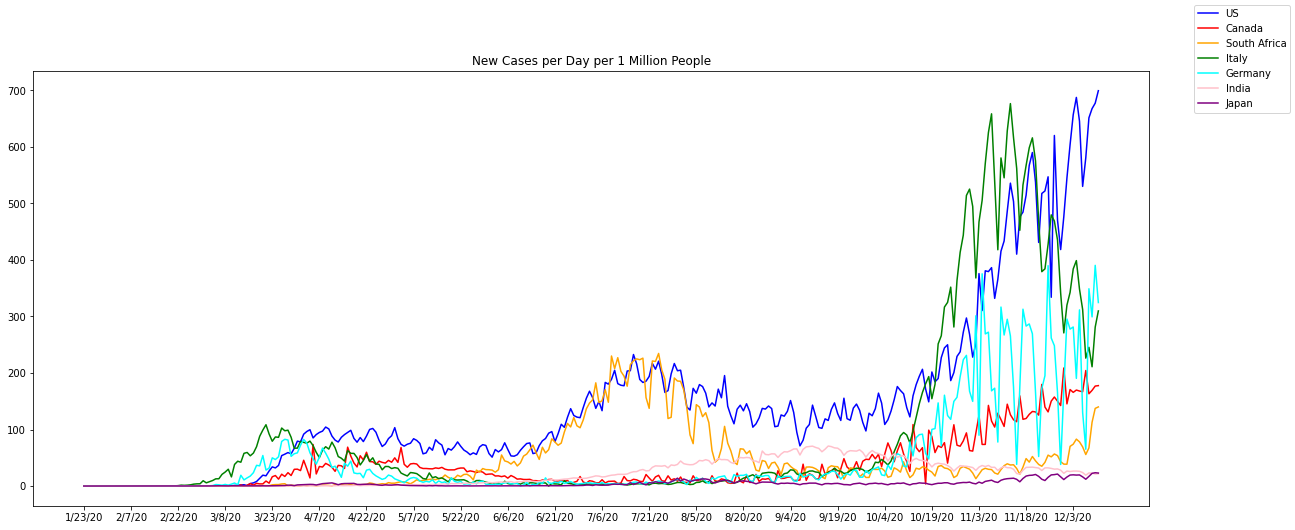

In [73]:
# per capita for daily cases per 1 million
daily_cases_per_capita = daily_cases_global_pop.iloc[:,2:].div(daily_cases_global_pop['Population'] / 1000000, axis=0)
daily_cases_per_capita.insert(0, 'Country', daily_cases_global_pop['Country'])

# chart daily cases per million people  
daily_cases_per_capita_chart = plt.figure(figsize=(20, 8))
plt.plot(daily_cases_per_capita.columns[1:], daily_cases_per_capita[daily_cases_per_capita['Country'] == 'US'].iloc[0][1:], color='blue')
plt.plot(daily_cases_per_capita.columns[1:], daily_cases_per_capita[daily_cases_per_capita['Country'] == 'Canada'].iloc[0][1:], color='red')
plt.plot(daily_cases_per_capita.columns[1:], daily_cases_per_capita[daily_cases_per_capita['Country'] == 'South Africa'].iloc[0][1:], color='orange')
plt.plot(daily_cases_per_capita.columns[1:], daily_cases_per_capita[daily_cases_per_capita['Country'] == 'Italy'].iloc[0][1:], color='green')
plt.plot(daily_cases_per_capita.columns[1:], daily_cases_per_capita[daily_cases_per_capita['Country'] == 'Germany'].iloc[0][1:], color='cyan')
plt.plot(daily_cases_per_capita.columns[1:], daily_cases_per_capita[daily_cases_per_capita['Country'] == 'India'].iloc[0][1:], color='pink')
plt.plot(daily_cases_per_capita.columns[1:], daily_cases_per_capita[daily_cases_per_capita['Country'] == 'Japan'].iloc[0][1:], color='purple')
plt.xticks(np.arange(len(daily_cases_per_capita.columns[1:]), step=15))
plt.title('New Cases per Day per 1 Million People')

daily_cases_per_capita_chart.legend(['US', 'Canada', 'South Africa', 'Italy', 'Germany', 'India', 'Japan'])

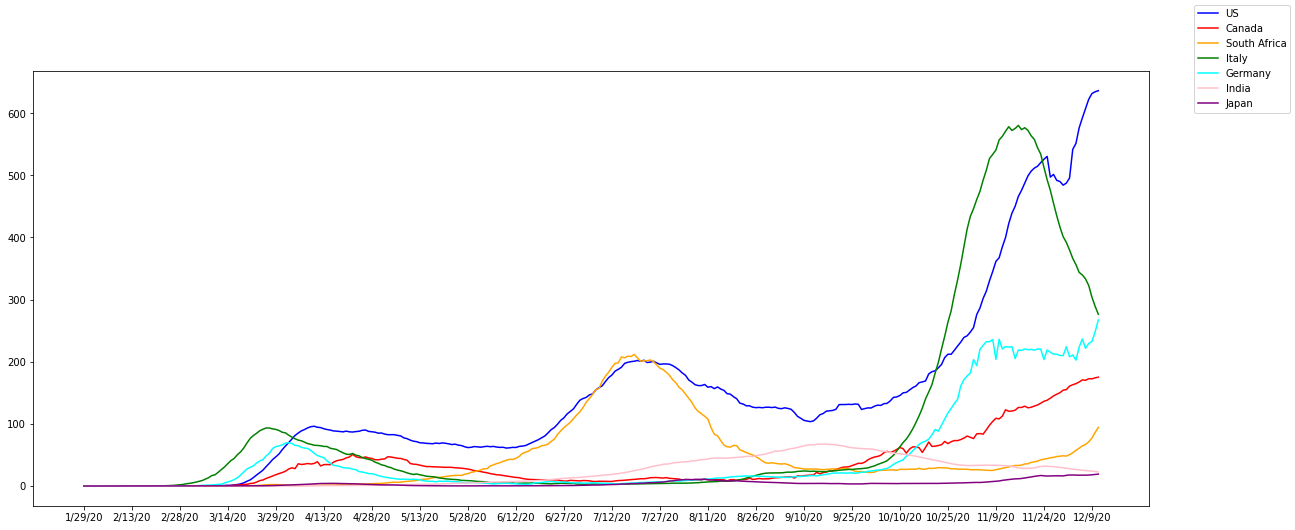

In [74]:
# plot the weekly cases per capita per 1 million
weekly_cases_per_capita = daily_cases_per_capita.rolling(window=7, axis=1).mean()
weekly_cases_per_capita.insert(0, 'Country', daily_cases_per_capita['Country'])
weekly_cases_per_capita = weekly_cases_per_capita.dropna(axis=1)

weekly_cases_per_capita_chart = plt.figure(figsize=(20, 8))
plt.plot(weekly_cases_per_capita.columns[1:], weekly_cases_per_capita[weekly_cases_per_capita['Country'] == 'US'].iloc[0][1:], color='blue')
plt.plot(weekly_cases_per_capita.columns[1:], weekly_cases_per_capita[weekly_cases_per_capita['Country'] == 'Canada'].iloc[0][1:], color='red')
plt.plot(weekly_cases_per_capita.columns[1:], weekly_cases_per_capita[weekly_cases_per_capita['Country'] == 'South Africa'].iloc[0][1:], color='orange')
plt.plot(weekly_cases_per_capita.columns[1:], weekly_cases_per_capita[weekly_cases_per_capita['Country'] == 'Italy'].iloc[0][1:], color='green')
plt.plot(weekly_cases_per_capita.columns[1:], weekly_cases_per_capita[weekly_cases_per_capita['Country'] == 'Germany'].iloc[0][1:], color='cyan')
plt.plot(weekly_cases_per_capita.columns[1:], weekly_cases_per_capita[weekly_cases_per_capita['Country'] == 'India'].iloc[0][1:], color='pink')
plt.plot(weekly_cases_per_capita.columns[1:], weekly_cases_per_capita[weekly_cases_per_capita['Country'] == 'Japan'].iloc[0][1:], color='purple')
plt.xticks(np.arange(len(weekly_cases_per_capita.columns[1:]), step=15))

weekly_cases_per_capita_chart.legend(['US', 'Canada', 'South Africa', 'Italy', 'Germany', 'India', 'Japan'])

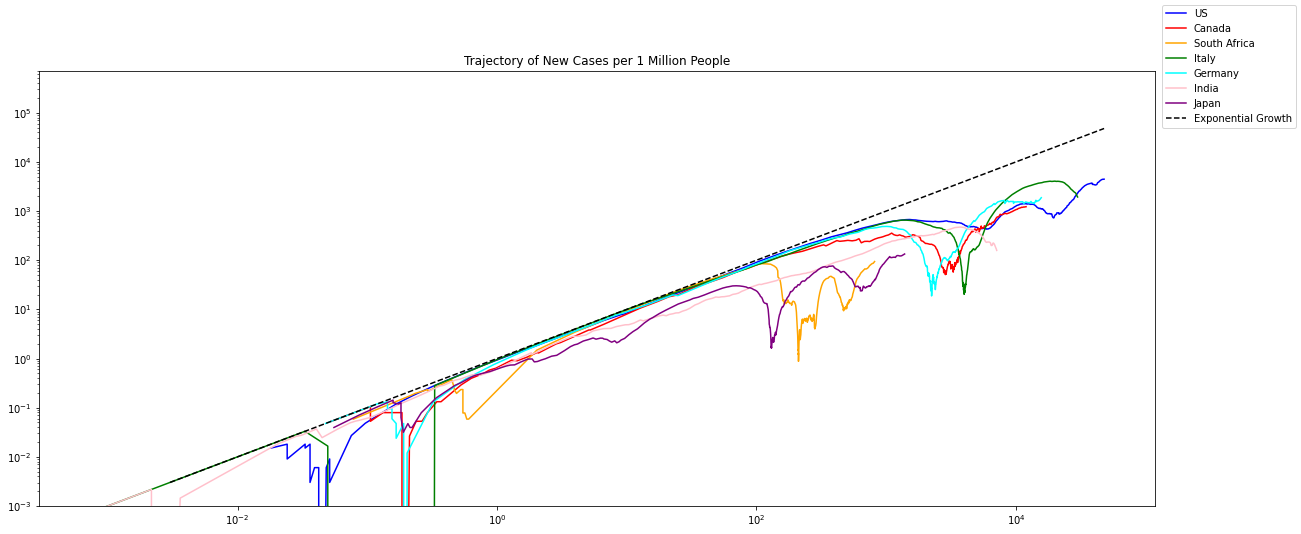

In [75]:
# plot the weekly trajectory for each country
total_weekly_cases_per_capita = daily_cases_per_capita.rolling(window=7, axis=1).sum()
total_weekly_cases_per_capita.insert(0, 'Country', daily_cases_per_capita['Country'])
total_weekly_cases_per_capita = total_weekly_cases_per_capita.dropna(axis=1)

weekly_growth_chart = plt.figure(figsize=(20, 8))
plt.plot(confirmed_cases_cleaned[confirmed_cases_cleaned['Country/Region'] == 'US'].iloc[0][8:]
         .div(float(daily_cases_global_pop[daily_cases_global_pop['Country'] == 'US']['Population']) / 1000000), 
         total_weekly_cases_per_capita[total_weekly_cases_per_capita['Country'] == 'US'].iloc[0][1:], color='blue')
plt.plot(confirmed_cases_cleaned[confirmed_cases_cleaned['Country/Region'] == 'Canada'].iloc[0][8:]
         .div(float(daily_cases_global_pop[daily_cases_global_pop['Country'] == 'Canada']['Population']) / 1000000), 
         total_weekly_cases_per_capita[total_weekly_cases_per_capita['Country'] == 'Canada'].iloc[0][1:], color='red')
plt.plot(confirmed_cases_cleaned[confirmed_cases_cleaned['Country/Region'] == 'Korea, South'].iloc[0][8:]
         .div(float(daily_cases_global_pop[daily_cases_global_pop['Country'] == 'Korea, South']['Population']) / 1000000),
         total_weekly_cases_per_capita[total_weekly_cases_per_capita['Country'] == 'Korea, South'].iloc[0][1:], color='orange')
plt.plot(confirmed_cases_cleaned[confirmed_cases_cleaned['Country/Region'] == 'Italy'].iloc[0][8:]
         .div(float(daily_cases_global_pop[daily_cases_global_pop['Country'] == 'Italy']['Population']) / 1000000),
         total_weekly_cases_per_capita[total_weekly_cases_per_capita['Country'] == 'Italy'].iloc[0][1:], color='green')
plt.plot(confirmed_cases_cleaned[confirmed_cases_cleaned['Country/Region'] == 'Germany'].iloc[0][8:]
         .div(float(daily_cases_global_pop[daily_cases_global_pop['Country'] == 'Germany']['Population']) / 1000000),
         total_weekly_cases_per_capita[total_weekly_cases_per_capita['Country'] == 'Germany'].iloc[0][1:], color='cyan')
plt.plot(confirmed_cases_cleaned[confirmed_cases_cleaned['Country/Region'] == 'India'].iloc[0][8:]
         .div(float(daily_cases_global_pop[daily_cases_global_pop['Country'] == 'India']['Population']) / 1000000),
         total_weekly_cases_per_capita[total_weekly_cases_per_capita['Country'] == 'India'].iloc[0][1:], color='pink')
plt.plot(confirmed_cases_cleaned[confirmed_cases_cleaned['Country/Region'] == 'Japan'].iloc[0][8:]
         .div(float(daily_cases_global_pop[daily_cases_global_pop['Country'] == 'Japan']['Population']) / 1000000),
         total_weekly_cases_per_capita[total_weekly_cases_per_capita['Country'] == 'Japan'].iloc[0][1:], color='purple')


# exponential growth line
plt.plot([confirmed_cases_cleaned[confirmed_cases_cleaned['Country/Region'] == 'US'].iloc[0][1]
          / (float(daily_cases_global_pop[daily_cases_global_pop['Country'] == 'US']['Population']) / 1000000), 
          confirmed_cases_cleaned[confirmed_cases_cleaned['Country/Region'] == 'US'].iloc[0][-1]
         / (float(daily_cases_global_pop[daily_cases_global_pop['Country'] == 'US']['Population']) / 1000000)], 
          [confirmed_cases_cleaned[confirmed_cases_cleaned['Country/Region'] == 'US'].iloc[0][1] / 
           (daily_cases_global_pop[daily_cases_global_pop['Country'] == 'US']['Population'] / 1000000)
           , confirmed_cases_cleaned[confirmed_cases_cleaned['Country/Region'] == 'US'].iloc[0][-1] / 
          (daily_cases_global_pop[daily_cases_global_pop['Country'] == 'US']['Population'] / 1000000)],
        'k--')

plt.yscale('log')
plt.ylim(bottom=0.001)
plt.xscale('log')
plt.title('Trajectory of New Cases per 1 Million People')
weekly_growth_chart.legend(['US', 'Canada', 'South Africa', 'Italy', 'Germany', 'India', 'Japan', 'Exponential Growth'])

In [57]:
# weekly_cases_per_capita_all = plt.figure(figsize=(20, 8))
# for i in range(len(weekly_cases_per_capita)):
#     plt.plot(weekly_cases_per_capita.columns[1:], weekly_cases_per_capita.iloc[i][1:])
    
# plt.title('New Cases per Week per 1 Million People')
# plt.xticks(np.arange(len(weekly_cases_per_capita.columns[1:]), step=15))


In [56]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# # plot the Silhoutte index as function of k here.
# silhouette_scores = []

# for i in range(2, 10):
#     y_predicted = KMeans(i, random_state=0).fit_predict(weekly_cases_per_capita.drop('Country', axis=1))
#     s_i = silhouette_score(weekly_cases_per_capita.drop('Country', axis=1), y_predicted)
#     silhouette_scores.append(s_i)

# plt.plot(range(2, 10), silhouette_scores)

# y_predicted = KMeans(2, random_state=0).fit_predict(weekly_cases_per_capita.drop('Country', axis=1))

# weekly_cases_per_capita_all = plt.figure(figsize=(20, 8))
# for i in range(len(weekly_cases_per_capita)):
#     if y_predicted[i] == 0:
#         col = 'b'
#     else:
#         col = 'r'
#     plt.plot(weekly_cases_per_capita.columns[1:], weekly_cases_per_capita.iloc[i][1:], color=col)
    
# plt.title('New Cases per Week per 1 Million People')
# plt.xticks(np.arange(len(weekly_cases_per_capita.columns[1:]), step=15))

# Death Cases

In [75]:
death_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
death_cases = death_cases.drop(['Lat', 'Long'], axis=1)

In [76]:
# gather data for all of Australia
deadAU = death_cases.loc[death_cases['Country/Region'] == 'Australia']
AU_sums = deadAU.sum(axis=0)
AU_sums[1] = 'Australia'
deadAU_sum = pd.DataFrame(AU_sums).T.drop(['Province/State'], axis=1)

# gather data for all of Canada
deadCA = death_cases.loc[death_cases['Country/Region'] == 'Canada']
CA_sums = deadCA.sum(axis=0)
CA_sums[1] = 'Canada'
deadCA_sum = pd.DataFrame(CA_sums).T.drop(['Province/State'], axis=1)

# gather data for all of China
deadCH = death_cases.loc[death_cases['Country/Region'] == 'China']
CH_sums = confirmedCH.sum(axis=0)
CH_sums[1] = 'China'
deadCH_sum = pd.DataFrame(CH_sums).T.drop(['Province/State'], axis=1)

# add the data to the data frame
death_cases_cleaned = death_cases.append(deadAU_sum)
death_cases_cleaned = death_cases_cleaned.append(deadCA_sum)
death_cases_cleaned = death_cases_cleaned.append(deadCH_sum)

# remove province/states from our data so we only have totals for countries
death_cases_cleaned = death_cases_cleaned.drop(death_cases_cleaned[death_cases_cleaned['Province/State'] == death_cases_cleaned['Province/State']].index)

# reorganize the dataframe with the compiled data
death_cases_cleaned = death_cases_cleaned.sort_values(by='Country/Region').reset_index().drop(['index', 'Province/State'], axis=1)
death_cases_cleaned

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1795,1822,1841,1846,1846,1864,1874,1900,1906,1919
1,Albania,0,0,0,0,0,0,0,0,0,...,810,822,839,852,870,889,905,922,936,951
2,Algeria,0,0,0,0,0,0,0,0,0,...,2431,2447,2464,2480,2492,2501,2516,2527,2539,2554
3,Andorra,0,0,0,0,0,0,0,0,0,...,76,76,76,77,77,78,78,78,78,78
4,Angola,0,0,0,0,0,0,0,0,0,...,348,350,351,352,353,354,354,354,355,358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Vietnam,0,0,0,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,35,35
187,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,732,747,763,780,797,812,828,848,867,890
188,Yemen,0,0,0,0,0,0,0,0,0,...,619,619,621,624,627,633,639,649,606,606
189,Zambia,0,0,0,0,0,0,0,0,0,...,357,357,357,357,364,364,364,364,364,364


In [78]:
# generate daily death data
death_nums = []
for i in range(len(death_cases_cleaned)):
    series = []
    for j in range(1, len(death_cases_cleaned.columns) - 1):
        series.append(death_cases_cleaned.loc[i][j+1] - death_cases_cleaned.loc[i][j])
    death_nums.append(series)

daily_deaths_global = pd.DataFrame(death_nums)
daily_deaths_global.columns = death_cases_cleaned.columns[2:]
daily_deaths_global.insert(0, 'Country', death_cases_cleaned['Country/Region'])

# set negative numbers to 0
daily_deaths_global._get_numeric_data()[daily_deaths_global._get_numeric_data() < 0] = 0
daily_deaths_global

,Country,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,21,27,19,5,0,18,10,26,6,13
1,Albania,0,0,0,0,0,0,0,0,0,...,12,12,17,13,18,19,16,17,14,15
2,Algeria,0,0,0,0,0,0,0,0,0,...,21,16,17,16,12,9,15,11,12,15
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,Angola,0,0,0,0,0,0,0,0,0,...,2,2,1,1,1,1,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Vietnam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
187,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,15,15,16,17,17,15,16,20,19,23
188,Yemen,0,0,0,0,0,0,0,0,0,...,2,0,2,3,3,6,6,10,0,0
189,Zambia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7,0,0,0,0,0


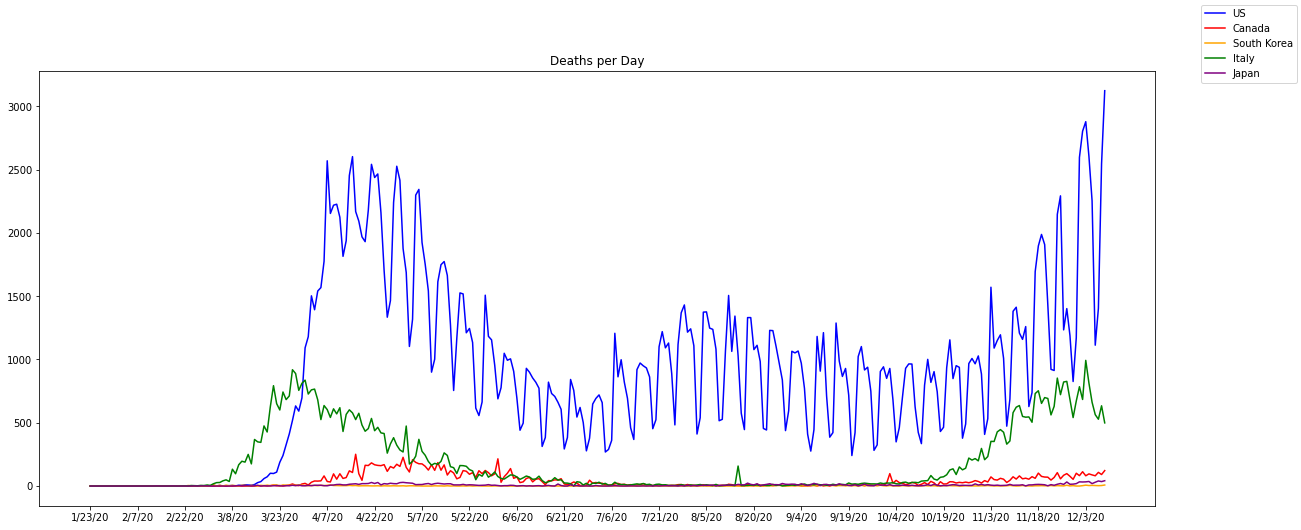

In [79]:
# plot daily death numbers
daily_deaths_chart = plt.figure(figsize=(20, 8))
plt.plot(daily_deaths_global.columns[1:], daily_deaths_global[daily_deaths_global['Country'] == 'US'].iloc[0][1:], color='blue')
plt.plot(daily_deaths_global.columns[1:], daily_deaths_global[daily_deaths_global['Country'] == 'Canada'].iloc[0][1:], color='red')
plt.plot(daily_deaths_global.columns[1:], daily_deaths_global[daily_deaths_global['Country'] == 'Korea, South'].iloc[0][1:], color='orange')
plt.plot(daily_deaths_global.columns[1:], daily_deaths_global[daily_deaths_global['Country'] == 'Italy'].iloc[0][1:], color='green')
plt.plot(daily_deaths_global.columns[1:], daily_deaths_global[daily_deaths_global['Country'] == 'Japan'].iloc[0][1:], color='purple')
plt.xticks(np.arange(len(daily_deaths_global.columns[1:]), step=15))
plt.title('Deaths per Day',)

daily_deaths_chart.legend(['US', 'Canada', 'South Korea', 'Italy', 'Japan'])

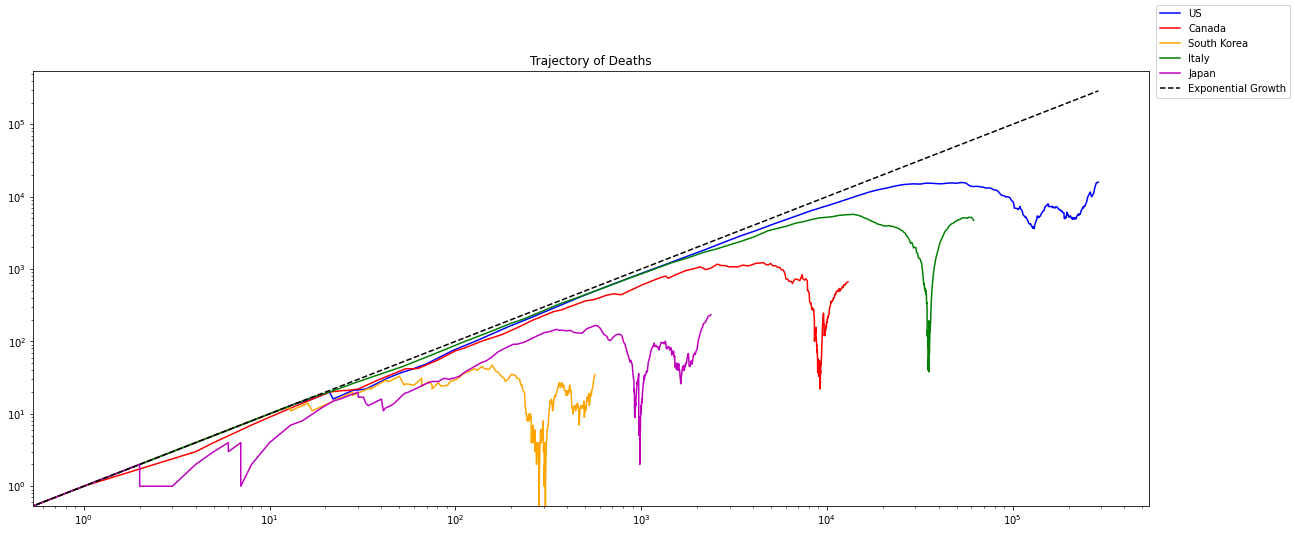

In [80]:
# calculate weekly deaths for each country
weekly_deaths_US = []
weekly_deaths_CA = []
weekly_deaths_SK = []
weekly_deaths_IT = []
weekly_deaths_JP = []
for i in range(1, len(death_cases_cleaned.columns) - 7):
    weekly_deaths_US.append(np.sum(daily_deaths_global[daily_deaths_global['Country'] == 'US'].iloc[0][i:i+7]))
    weekly_deaths_CA.append(np.sum(daily_deaths_global[daily_deaths_global['Country'] == 'Canada'].iloc[0][i:i+7]))
    weekly_deaths_SK.append(np.sum(daily_deaths_global[daily_deaths_global['Country'] == 'Korea, South'].iloc[0][i:i+7]))
    weekly_deaths_IT.append(np.sum(daily_deaths_global[daily_deaths_global['Country'] == 'Italy'].iloc[0][i:i+7]))
    weekly_deaths_JP.append(np.sum(daily_deaths_global[daily_deaths_global['Country'] == 'Japan'].iloc[0][i:i+7]))
    
weekly_growth_chart = plt.figure(figsize=(20, 8))
plt.plot(death_cases_cleaned[death_cases_cleaned['Country/Region'] == 'US'].iloc[0][8:], weekly_deaths_US, 'b')
plt.plot(death_cases_cleaned[death_cases_cleaned['Country/Region'] == 'Canada'].iloc[0][8:], weekly_deaths_CA, 'r')
plt.plot(death_cases_cleaned[death_cases_cleaned['Country/Region'] == 'Korea, South'].iloc[0][8:], weekly_deaths_SK, color='orange')
plt.plot(death_cases_cleaned[death_cases_cleaned['Country/Region'] == 'Italy'].iloc[0][8:], weekly_deaths_IT, 'g')
plt.plot(death_cases_cleaned[death_cases_cleaned['Country/Region'] == 'Japan'].iloc[0][8:], weekly_deaths_JP, 'm')
plt.plot([death_cases_cleaned[death_cases_cleaned['Country/Region'] == 'US'].iloc[0][1], death_cases_cleaned[death_cases_cleaned['Country/Region'] == 'US'].iloc[0][-1]], 
          [death_cases_cleaned[death_cases_cleaned['Country/Region'] == 'US'].iloc[0][1], death_cases_cleaned[death_cases_cleaned['Country/Region'] == 'US'].iloc[0][-1]],
        'k--')
plt.yscale('log')
plt.xscale('log')
plt.title('Trajectory of Deaths')
weekly_growth_chart.legend(['US', 'Canada', 'South Korea', 'Italy', 'Japan', 'Exponential Growth'])